In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten

In [2]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# 셈플 이미지 시각화

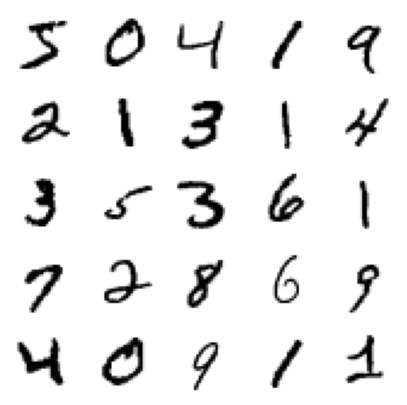

In [5]:
fig, ax = plt.subplots(5,5,figsize=(5,5))
for i in range(25):
    ax[i//5, i%5].imshow(x_train[i],cmap='gray_r')
    ax[i//5, i%5].axis('off')
plt.show()    

In [6]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [7]:
x_train_scaled = np.expand_dims(x_train_scaled,axis=-1)
x_test_scaled = np.expand_dims(x_test_scaled,axis=-1)
x_train_scaled.shape, x_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# 차수 1에 대한 차수를 축소...하는 함수...

In [9]:
# 정답인 종속변수를 one hot encording으로 변환
y_train =  tf.keras.utils.to_categorical(y_train)
y_train.shape

(60000, 10)

In [10]:
y_test =  tf.keras.utils.to_categorical(y_test)
y_test.shape

(10000, 10)

In [11]:
cnn = tf.keras.Sequential()

In [12]:
# C-P-C-P-C-FC-FC 구조의 컨볼류션 신경망  - 디자인 패턴적용
# NeNet-5

cnn.add(Conv2D(6,(5,5), padding='same', activation='relu',input_shape=(28,28,1) ))
cnn.add(MaxPool2D(pool_size=(2,2) ))
cnn.add(Conv2D(18,(5,5), padding='same', activation='relu' ))
cnn.add(MaxPool2D(pool_size=(2,2) ))
cnn.add(Conv2D(120,(5,5), padding='same', activation='relu' ))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [13]:
# 신경망 모델 학습
earlystop  = tf.keras.callbacks.EarlyStopping(patience=2)
cnn.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = cnn.fit(x_train_scaled,y_train,batch_size=128
                  ,epochs=100,validation_data=[x_test_scaled,y_test],
                 callbacks=[earlystop])

Epoch 1/100
469/469 [==============================] - 24s 50ms/step - loss: 0.2069 - accuracy: 0.9365 - val_loss: 0.0619 - val_accuracy: 0.9806
Epoch 2/100
469/469 [==============================] - 23s 49ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0400 - val_accuracy: 0.9865
Epoch 3/100
469/469 [==============================] - 22s 47ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 4/100
469/469 [==============================] - 22s 47ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 5/100
469/469 [==============================] - 22s 48ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 6/100
469/469 [==============================] - 23s 49ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 7/100
469/469 [==============================] - 22s 48ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0334 - val_ac

In [14]:
cnn.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9894


[0.033370185643434525, 0.9894000291824341]

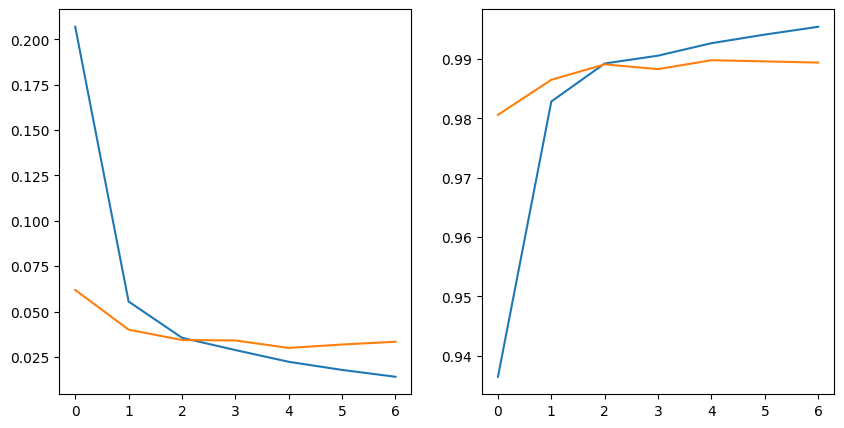

In [16]:
#손실함수, 정확률 
_, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
plt.show()